In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datasets/LoanData_Bondora.csv", low_memory=False)

In [3]:
df.shape

(179235, 112)

We have 179235 records and 112 attributes. Now let's look on distribution of loan statuses across dataset.

In [4]:
df["Status"].value_counts()

Status
Late       68574
Current    57774
Repaid     52887
Name: count, dtype: int64

The records of the dataset are split into 3 categories under the Status criteria: Late (38.3% records), Current (32.2% records), Repaid (29.5% records).

In [5]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2021-07-20,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150,5.0,BO965519,False,...,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.00,51.73,31-60
1,2021-07-20,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0,1705.0,BOA9K172A,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,47.08,180+
2,2021-07-20,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565,5835.0,BO7971663,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,259.67,1659.60,180+
3,2021-07-20,87227056-6BF9-410C-98D1-008F788E122A,349381,2015-03-24 15:55:44,2015-03-24 15:55:44,1115,0,385.0,BO76151K3,True,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,215.05,180+
4,2021-07-20,2DDE6336-E466-4624-A337-00A0ED1A1468,443082,2015-12-17 10:12:00,2015-12-17 10:12:00,305,0,785.0,BOK423A63,True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,180+


The following table provides an overview of all the attributes of the dataset. (REDO myself)

| Feature                             | Description                                                                                                                                                                           |
|-------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ReportAsOfEOD                       | Date of event of default                                                                                                                                                              |
| LoanId                              | Unique Loan Id of the borrower                                                                                                                                                        |
| LoanNumber                          | Unique number given to all applications                                                                                                                                               |
| ListedOnUTC                         | Date when the loan application appeared on Primary Market                                                                                                                             |
| BiddingStartedOn                    | Date and time when potential investors can start placing their bids to fund the loan                                                                                                  |
| BidsPortfolioManager                | The amount of investment offers made by Portfolio Managers                                                                                                                            |
| BidsApi                             | The amount of investment offers made via Api                                                                                                                                          |
| BidsManual                          | The amount of investment offers made manually                                                                                                                                         |
| UserName                            | The user name generated by the system for the borrower                                                                                                                                |
| NewCreditCustomer                   | Did the customer have prior credit history: 0 Customer had at least 3 months of credit history; 1 No prior credit history                                                             |
| LoanApplicationStartedDate          | Date when loan application started                                                                                                                                                    |
| LoanDate                            | Date when the loan was issued                                                                                                                                                         |
| FirstPaymentDate                    | First payment date according to initial loan schedule                                                                                                                                 |
| MaturityDate_Original               | Loan maturity date according to the original loan schedule                                                                                                                            |
| MaturityDate_Last                   | Loan maturity date according to the current payment schedule                                                                                                                          |
| ApplicationSignedHour               | Hour of the day when a loan application was signed by the borrower                                                                                                                    |
| ApplicationSignedWeekday            | Day of the week when a loan application was signed by the borrower                                                                                                                    |
| VerificationType                    | Method used for loan application data verification: 0 Not set; 1 Income unverified; 2 Income unverified, cross-referenced by phone; 3 Income verified; 4 Income and expenses verified  |
| LanguageCode                        | 1 Estonian; 2 English; 3 Russian; 4 Finnish; 5 German; 6 Spanish; 9 Slovakian                                                                                                         |
| Age                                 | The age of the borrower when signing the loan application                                                                                                                             |
| Gender                              | 0 Male; 1 Woman; 2 Undefined                                                                                                                                                          |
| Country                             | Residency of the borrower                                                                                                                                                             |
| AppliedAmount                       | The amount borrower applied for originally                                                                                                                                            |
| Amount                              | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                              |
| Interest                            | Maximum interest rate accepted in the loan application                                                                                                                                |
| LoanDuration                        | Current loan duration in months                                                                                                                                                       |
| MonthlyPayment                      | Estimated amount the borrower has to pay every month                                                                                                                                  |
| UseOfLoan                           | 0 Loan consolidation; 1 Real estate; 2 Home improvement; 3 Business; 4 Education; 5 Travel; 6 Vehicle; 7 Other; 8 Health; 101 Working capital financing; 102 Purchase of machinery equipment; 103 Renovation of real estate; 104 Accounts receivable financing; 105 Acquisition of means of transport; 106 Construction finance; 107 Acquisition of stocks; 108 Acquisition of real estate; 109 Guaranteeing obligation; 110 Other business; All codes in format 1XX are for business loans that are not supported since October 2012 |
| Education                           | 1 Primary education; 2 Basic education; 3 Vocational education; 4 Secondary education; 5 Higher education                                                                             |
| MaritalStatus                       | 1 Married; 2 Cohabitant; 3 Single; 4 Divorced; 5 Widow                                                                                                                                |
| EmploymentStatus                    | 1 Unemployed; 2 Partially employed; 3 Fully employed; 4 Self-employed; 5 Entrepreneur; 6 Retiree                                                                                      |
| EmploymentDurationCurrentEmployer   | Employment time with the current employer                                                                                                                                             |
| OccupationArea                      | 1 Other; 2 Mining; 3 Processing; 4 Energy; 5 Utilities; 6 Construction; 7 Retail and wholesale; 8 Transport and warehousing; 9 Hospitality and catering; 10 Info and telecom; 11 Finance and insurance; 12 Real-estate; 13 Research; 14 Administrative; 15 Civil service & military; 16 Education; 17 Healthcare and social help; 18 Art and entertainment; 19 Agriculture, forestry and fishing                                         |
| HomeOwnershipType                   | 0 Homeless; 1 Owner; 2 Living with parents; 3 Tenant pre-furnished property; 4 Tenant, unfurnished property; 5 Council house; 6 Joint tenant; 7 Joint ownership; 8 Mortgage; 9 Owner with encumbrance; 10 Other                                                                                                  |
| IncomeFromPrincipalEmployer         | Borrower's income from its employer                                                                                                                                                   |
| IncomeFromPension                   | Borrower's income from pension                                                                                                                                                        |
| IncomeFromFamilyAllowance           | Borrower's income from child support                                                                                                                                                   |
| IncomeFromSocialWelfare             | Borrower's income from social support                                                                                                                                                  |
| IncomeFromLeavePay                  | Borrower's income from paternity leave                                                                                                                                                 |
| IncomeFromChildSupport              | Borrower's income from alimony payments                                                                                                                                                |
| IncomeOther                         | Borrower's income from other sources                                                                                                                                                   |
| IncomeTotal                         | Borrower's total income                                                                                                                                                                |
| ExistingLiabilities                 | Borrower's number of existing liabilities                                                                                                                                             |
| LiabilitiesTotal                    | Total monthly liabilities                                                                                                                                                              |
| RefinanceLiabilities                | The total amount of liabilities after refinancing                                                                                                                                      |
| DebtToIncome                        | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                 |
| FreeCash                            | Discretionary income after monthly liabilities                                                                                                                                         |
| MonthlyPaymentDay                   | The day of the month the loan payments are scheduled for. The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                      |
| ActiveScheduleFirstPaymentReached   | Whether the first payment date has been reached according to the active schedule                                                                                                       |
| PlannedInterestTillDate             | According to active schedule the amount of interest the investment should have received                                                                                              |
| LastPaymentOn                       | The date of the current last payment received from the borrower                                                                                                                        |
| ExpectedLoss                        | Expected Loss calculated by the current Rating model                                                                                                                                   |
| LossGivenDefault                    | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| ExpectedReturn                      | Expected Return calculated by the current Rating model                                                                                                                                 |
| ProbabilityOfDefault                | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                             |
| PrincipalOverdueBySchedule          | According to the current schedule, principal that is overdue                                                                                                                           |
| RecoveryStage                       | Current stage according to the recovery model: 1 Collection; 2 Recovery; 3 Write Off                                                                                                   |
| StageActiveSince                    | How long the current recovery stage has been active                                                                                                                                    |
| ModelVersion                        | The version of the Rating model used for issuing the Bondora Rating                                                                                                                    |
| Rating                              | Bondora Rating issued by the Rating model                                                                                                                                              |
| Status                              | The current status of the loan application: Current, Late, Repaid                                                                                                                      |
| Restructured                        | The original maturity date of the loan has been increased by more than 60 days                                                                                                          |
| WorseLateCategory                   | Displays the last longest period of days when the loan was in Principal Debt                                                                                                            |
| CreditScoreEsMicroL                 | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10                                             |
| PrincipalPaymentsMade               | Note owner received loan transfers principal amount                                                                                                                                    |
| InterestAndPenaltyPaymentsMade      | Note owner received loan transfers earned interest, penalties total amount                                                                                                             |
| PrincipalBalance                    | Principal that still needs to be paid by the borrower                                                                                                                                  |
| InterestAndPenaltyBalance           | Unpaid interest and penalties                                                                                                                                                          |
| NoOfPreviousLoansBeforeLoan         | Number of previous loans                                                                                                                                                               |
| AmountOfPreviousLoansBeforeLoan     | Value of previous loans                                                                                                                                                                |
| PreviousRepaymentsBeforeLoan        | How much was the early repayment amount before the loan                                                                                                                                |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                          |
| NextPaymentNr                       | According to schedule the number of the next payment                                                                                                                                   |
| NrOfScheduledPayments               | According to schedule the count of scheduled payments                                                                                                                                  |
| ContractEndDate                     | The date when the loan contract ended                                                                                                                                                   |
| DateOfBirth                         | The date of the borrower's birth                                                                                                                                                       |
| County                              | County of the borrower                                                                                                                                                                 |
| City                                | City of the borrower                                                                                                                                                                   |
| NrOfDependants                      | Number of children or other dependants                                                                                                                                                  |
| EmploymentPosition                  | Employment position with the current employer                                                                                                                                          |
| WorkExperience                      | Borrower's overall work experience in years                                                                                                                                            |
| PlannedPrincipalTillDate            | According to active schedule the amount of principal the investment should have received                                                                                              |
| CurrentDebtDaysPrimary              | How long the loan has been in Principal Debt                                                                                                                                           |
| DebtOccuredOn                       | The date when Principal Debt occurred                                                                                                                                                  |
| CurrentDebtDaysSecondary            | How long the loan has been in Interest Debt                                                                                                                                            |
| DebtOccuredOnForSecondary           | The date when Interest Debt occurred                                                                                                                                                   |
| DefaultDate                         | The date when loan went into defaulted state and collection process was started                                                                                                        |
| PlannedPrincipalPostDefault         | The amount of principal that was planned to be received after the default occurred                                                                                                      |
| PlannedInterestPostDefault          | The amount of interest that was planned to be received after the default occurred                                                                                                       |
| EAD1                                | Exposure at default, outstanding principal at default                                                                                                                                  |
| EAD2                                | Exposure at default, loan amount less all payments prior to default                                                                                                                    |
| PrincipalRecovery                   | Principal recovered due to collection process from in debt loans                                                                                                                       |
| InterestRecovery                    | Interest recovered due to collection process from in debt loans                                                                                                                        |
| EL_V0                               | Expected loss calculated by the specified version of Rating model                                                                                                                      |
| Rating_V0                           | Bondora Rating issued by version 0 of the Rating model                                                                                                                                 |
| EL_V1                               | Expected loss calculated by the specified version of Rating model                                                                                                                      |
| Rating_V1                           | Bondora Rating issued by version 1 of the Rating model                                                                                                                                 |
| Rating_V2                           | Bondora Rating issued by version 2 of the Rating model                                                                                                                                 |
| ActiveLateCategory                  | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                    |
| CreditScoreEsEquifaxRisk            | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”)                   |
| CreditScoreFiAsiakasTietoRiskGrade  | Credit Scoring model for Finnish Asiakastieto: RL1 Very low risk 01-20; RL2 Low risk 21-40; RL3 Average risk 41-60; RL4 Big risk 61-80; RL5 Huge risk 81-100                           |
| CreditScoreEeMini                   | 1000 No previous payments problems; 900 Payments problems finished 24-36 months ago; 800 Payments problems finished 12-24 months ago; 700 Payments problems finished 6-12 months ago; 600 Payment problems finished less 6 months ago; 500 Active payment problems                     |
| PrincipalWriteOffs                  | Principal that was written off on the investment                                                                                                                                       |
| InterestAndPenaltyWriteOffs         | Interest that was written off on the investment                                                                                                                                        |
| PreviousEarlyRepaymentsBefoleLoan   | How much was the early repayment amount before the loan                                                                                                                                |
| GracePeriodStart                    | Date of the beginning of Grace period                                                                                                                                                   |
| GracePeriodEnd                      | Date of the end of Grace period                                                                                                                                                         |
| NextPaymentDate                     | According to schedule the next date for borrower to make their payment                                                                                                                  |
| ReScheduledOn                       | The date when the a new schedule was assigned to the borrower                                                                                                                          |
| PrincipalDebtServicingCost          | Service cost related to the recovery of the debt based on the principal of the investment                                                                                               |
| InterestAndPenaltyDebtServicingCost | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                  |
| ActiveLateLastPaymentCategory       | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                      |


# Data Cleaning

We will be removing all the features that have more than 40% missing values.

In [6]:
nullFeatures = []
for col in df.columns:
    nullValues = df[col].isnull().sum()
    nullPercentage = nullValues/df.shape[0]
    if nullPercentage > 0.4:
        print(f"{col} : {nullPercentage*100:.2f}%")
        nullFeatures.append(col)
print(nullFeatures)

ContractEndDate : 42.54%
DateOfBirth : 100.00%
County : 100.00%
City : 100.00%
NrOfDependants : 80.14%
EmploymentPosition : 100.00%
WorkExperience : 79.62%
PlannedPrincipalTillDate : 69.61%
CurrentDebtDaysPrimary : 57.47%
DebtOccuredOn : 57.47%
CurrentDebtDaysSecondary : 54.10%
DebtOccuredOnForSecondary : 54.10%
DefaultDate : 60.16%
PlannedPrincipalPostDefault : 60.16%
PlannedInterestPostDefault : 60.16%
EAD1 : 60.16%
EAD2 : 60.16%
PrincipalRecovery : 60.16%
InterestRecovery : 60.16%
EL_V0 : 97.45%
Rating_V0 : 97.45%
EL_V1 : 92.79%
Rating_V1 : 92.79%
Rating_V2 : 85.97%
ActiveLateCategory : 58.16%
CreditScoreEsEquifaxRisk : 93.18%
CreditScoreFiAsiakasTietoRiskGrade : 76.66%
CreditScoreEeMini : 41.36%
PrincipalWriteOffs : 57.51%
InterestAndPenaltyWriteOffs : 57.51%
PreviousEarlyRepaymentsBefoleLoan : 67.15%
GracePeriodStart : 76.63%
GracePeriodEnd : 76.63%
NextPaymentDate : 63.39%
ReScheduledOn : 64.83%
PrincipalDebtServicingCost : 57.51%
InterestAndPenaltyDebtServicingCost : 57.51%
Acti

In [7]:
feat_remove = ['ContractEndDate', 'DateOfBirth', 'County', 'City', 'NrOfDependants', 'EmploymentPosition', 'WorkExperience', 
               'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary', 'DebtOccuredOn', 'CurrentDebtDaysSecondary', 
               'DebtOccuredOnForSecondary','PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 
               'EAD1', 'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2', 
               'ActiveLateCategory', 'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini', 
               'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs', 'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart', 'GracePeriodEnd', 
               'NextPaymentDate', 'ReScheduledOn', 'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory']
df = df.drop(feat_remove, axis = 1)
df.shape

(179235, 75)

Also, there are a number of features that will not play any role in predicting default risks. These are "LoanId", "LoanNumber", "ListedOnUTC", "BiddingStartedOn", "UserName", "LoanApplicationStartedDate", "ApplicationSignedHour", "ApplicationSignedWeekday", "NextPaymentNr". Also "IncomeFromPrincipalEmployer", "IncomeFromPension", "IncomeFromFamilyAllowance", "IncomeFromSocialWelfare", "IncomeFromLeavePay", "IncomeFromChildSupport", and "IncomeOther" would be removed since the sum of those incomes is accumulated in the "IncomeTotal" feature.gory'

In [8]:
removed_features = ["LoanId", "LoanNumber", "ListedOnUTC", "BiddingStartedOn", "UserName",
                    "LoanApplicationStartedDate", "ApplicationSignedHour", "ApplicationSignedWeekday", 
                    "NextPaymentNr", "IncomeFromPrincipalEmployer", "IncomeFromPension", "IncomeFromFamilyAllowance", 
                    "IncomeFromSocialWelfare", "IncomeFromLeavePay", "IncomeFromChildSupport", "IncomeOther"]

In [9]:
df = df.drop(removed_features, axis=1)
df.shape

(179235, 59)

Additionally, we are aiming to explore defaulted and non-defaulted loans. Hence we need to filter out the records with Loan Status set as "Current", as these loans could either mature to Late or Repaid. 

In [10]:
currentLoans = df[df["Status"]=="Current"]
df = df.drop(currentLoans.index)
df.shape

(121461, 59)

In [11]:
df["Status"].value_counts()

Status
Late      68574
Repaid    52887
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

I order to understand the data structure of Bondora dataset, and evaluate the data quality, we will be performing exploratory data analysis

([<matplotlib.patches.Wedge at 0x26215071280>,
 [Text(-0.3640004110277323, 1.0380287571987792, 'New Customers'),
  Text(0.36400050821499697, -1.0380287231185967, 'Old Customers')],
 [Text(-0.1985456787423994, 0.5661975039266068, '60.74%'),
  Text(0.19854573175363469, -0.5661974853374163, '39.26%')])

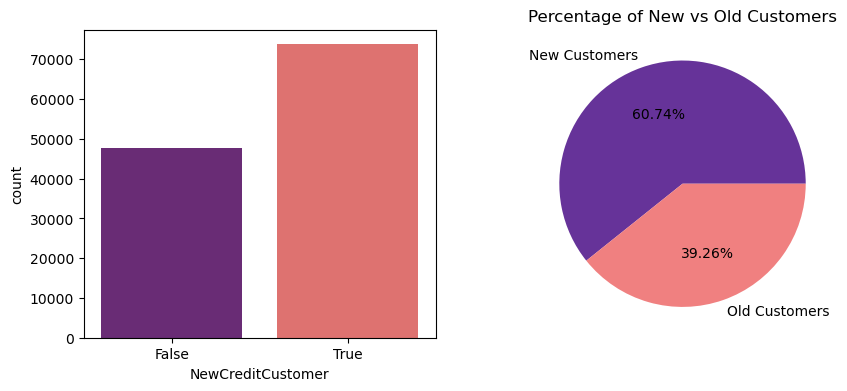

In [12]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x = df["NewCreditCustomer"], palette="magma")
plt.subplot(1, 2, 2)
label = [ "New Customers","Old Customers"]
plt.title("Percentage of New vs Old Customers")
plt.pie(x= df["NewCreditCustomer"].value_counts(), labels = label, colors=["rebeccapurple","lightcoral"], autopct = '%1.2f%%')

As seen from pie chart, the majority of borrowers on Bondora platform are new cust

<Axes: xlabel='MaritalStatus', ylabel='count'>

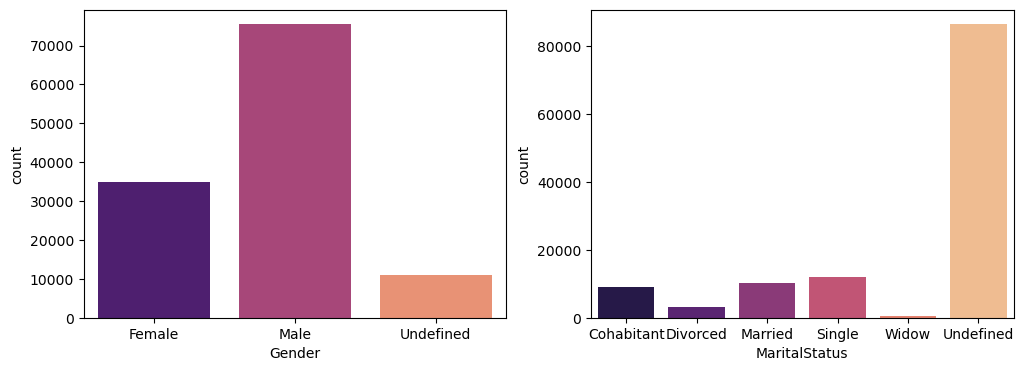

In [13]:
plt. figure(figsize=(12,4))
plt.subplot(1,2,1)
gender_labels = {0: 'Male', 1: 'Female', 2: 'Undefined'}
sns.countplot(x=df["Gender"].map(gender_labels),palette="magma")
plt.subplot(1,2,2)
marital_labels = {-1.0:"Undefined", 1.0: "Married", 2.0:"Cohabitant", 3.0:"Single", 4.0:"Divorced", 5.0:"Widow"}
sns.countplot(x=df["MaritalStatus"].map(marital_labels),palette="magma")


The majority of customers are Males. Also, most of the customers mis-entered or did not specify their Marital Status, so these entries would be considered as "Undefined".

<Axes: xlabel='EmploymentStatus', ylabel='count'>

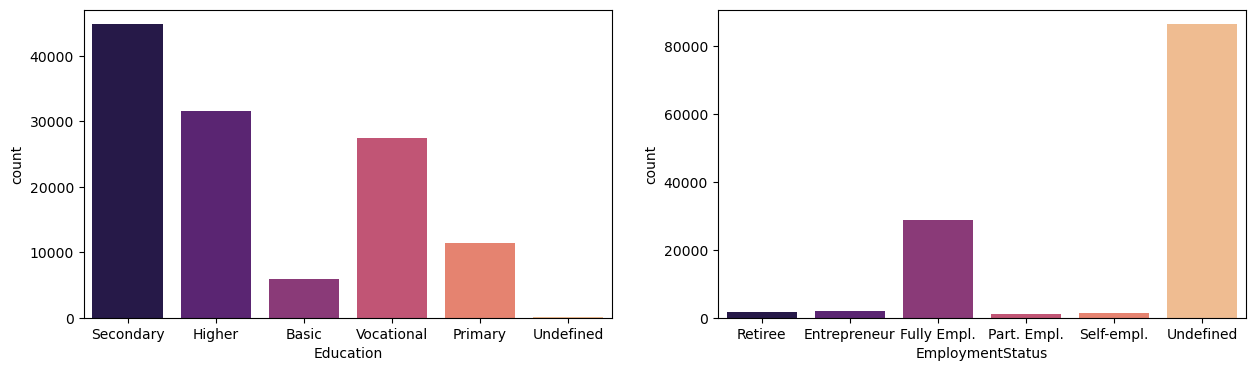

In [14]:
plt. figure(figsize=(15,4))
plt.subplot(1,2,1)
education_labels = {-1.0: "Undefined", 0.0: "Undefined", 1: 'Primary', 2: 'Basic', 3: "Vocational", 4:"Secondary",5:"Higher"}
sns.countplot(x=df["Education"].map(education_labels),palette="magma")
plt.subplot(1,2,2)
employment_labels = {-1.0:"Undefined",0:"Undefined", 1.0: "Unemployed", 2.0:"Part. Empl.", 3.0:"Fully Empl.", 4.0:"Self-empl.", 5.0:"Entrepreneur", 6.0 :"Retiree"}
sns.countplot(x=df["EmploymentStatus"].map(employment_labels),palette="magma")


Most of the customers have either Secondary or Higher education. However, the employment status was not specified or mis-entered, hence will be considered as "Undefined".

<Axes: xlabel='count', ylabel='HomeOwnershipType'>

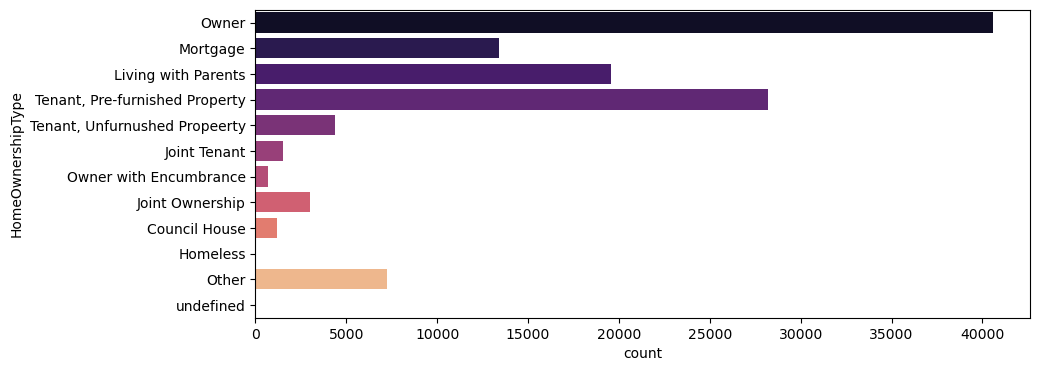

In [15]:
plt.figure(figsize=(10,4))
home_labels = {-1.0: "undefined", 0.0:"Homeless", 1.0:"Owner", 2.0:"Living with Parents", 3.0:"Tenant, Pre-furnished Property", 
               4.0:"Tenant, Unfurnushed Propeerty", 5.0:"Council House", 6.0:"Joint Tenant", 7.0:"Joint Ownership", 8.0:"Mortgage",
              9.0:"Owner with Encumbrance", 10.0:"Other"}
sns.countplot(y=df["HomeOwnershipType"].map(home_labels),palette="magma")


Most of the customers are either own their house, or rent a living property.

<Axes: xlabel='count', ylabel='EmploymentDurationCurrentEmployer'>

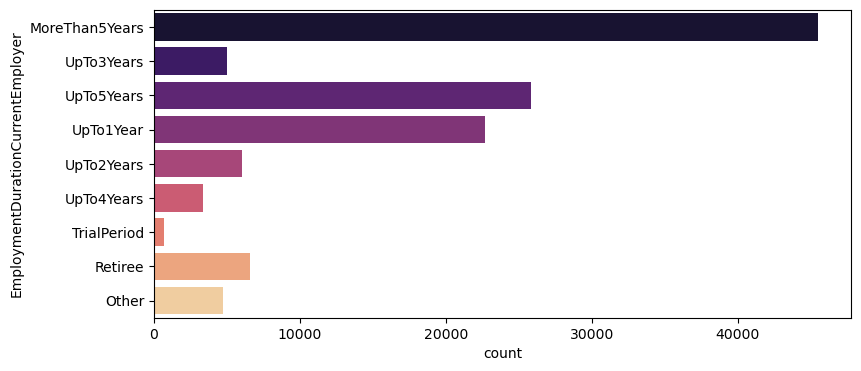

In [16]:
plt.figure(figsize=(9,4))
sns.countplot(y=df["EmploymentDurationCurrentEmployer"], palette="magma")

Most of the customers spent more than 5 years at the place of current employment.

<Axes: xlabel='count', ylabel='UseOfLoan'>

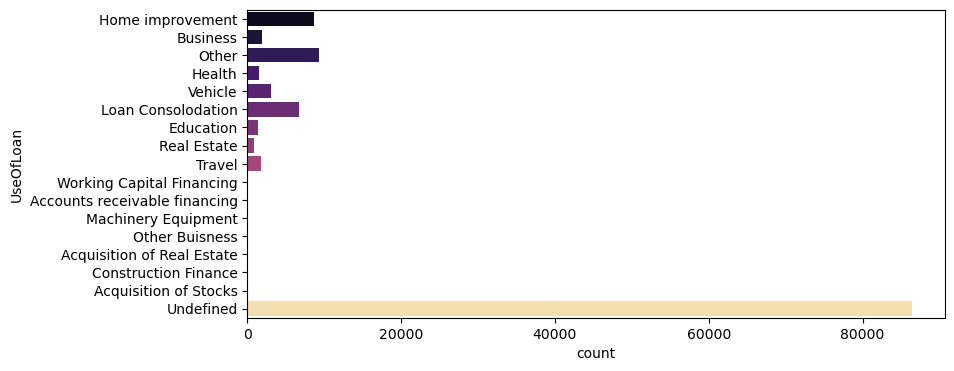

In [17]:
plt.figure(figsize=(9,4))
use_labels = {-1:"Undefined", 0: "Loan Consolodation", 1: "Real Estate", 2:"Home improvement", 3:"Business", 4:"Education", 5:"Travel", 6:"Vehicle",
             7:"Other", 8:"Health", 101:"Working Capital Financing", 102:"Machinery Equipment", 103:"Renovation of Real Estate", 
              104:"Accounts receivable financing", 105:"Acquisition of Means of Transport", 106:"Construction Finance", 107:"Acquisition of Stocks",
              108:"Acquisition of Real Estate", 109:"Guaranteeing Obligation", 110:"Other Buisness"
             }
sns.countplot(y=df["UseOfLoan"].map(use_labels), palette="magma")

Use of loan was not specified or mis-entered in most of cases, hence will be considered as "Undefined".

([<matplotlib.patches.Wedge at 0x262176f93a0>,
 [Text(-1.0999998053488116, 0.0006543948172871924, 'Reached'),
  Text(1.0999998053431275, -0.0006544043719690808, 'Unreached')],
 [Text(-0.5999998938266244, 0.0003569426276111959, '99.98%'),
  Text(0.5999998938235239, -0.0003569478392558622, '0.02%')])

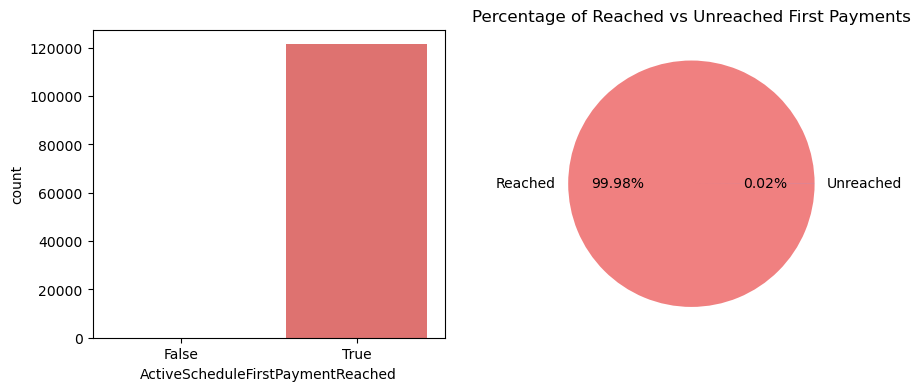

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=df["ActiveScheduleFirstPaymentReached"], palette="magma")
plt.subplot(1,2,2)
label = ["Reached", "Unreached"]
plt.title("Percentage of Reached vs Unreached First Payments")
plt.pie(x= df["ActiveScheduleFirstPaymentReached"].value_counts(),labels=label , colors=["lightcoral","rebeccapurple"], autopct = '%1.2f%%')


Nearly all the customers submitted their first payment according to the schedule.

([<matplotlib.patches.Wedge at 0x2621900db80>,
 [Text(-0.7218663827637943, 0.8300053767509674, 'Original'),
  Text(0.7218663827637942, -0.8300053767509675, 'Restructured')],
 [Text(-0.3937452996893423, 0.4527302055005276, '72.79%'),
  Text(0.39374529968934224, -0.45273020550052767, '27.21%')])

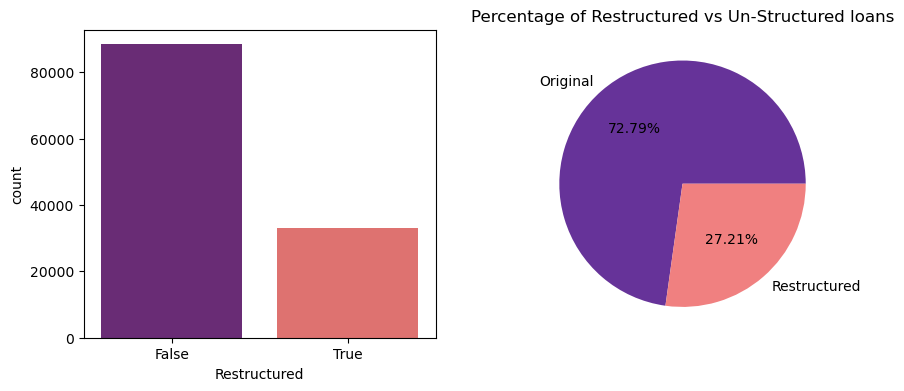

In [19]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)

sns.countplot( x = df["Restructured"], palette="magma")

plt.subplot(1, 2, 2)
label = ["Original","Restructured"]
plt.title("Percentage of Restructured vs Un-Structured loans")

plt.pie(x= df["Restructured"].value_counts(), labels = label, colors=["rebeccapurple","lightcoral"], autopct = '%1.2f%%')


<Axes: xlabel='Status', ylabel='count'>

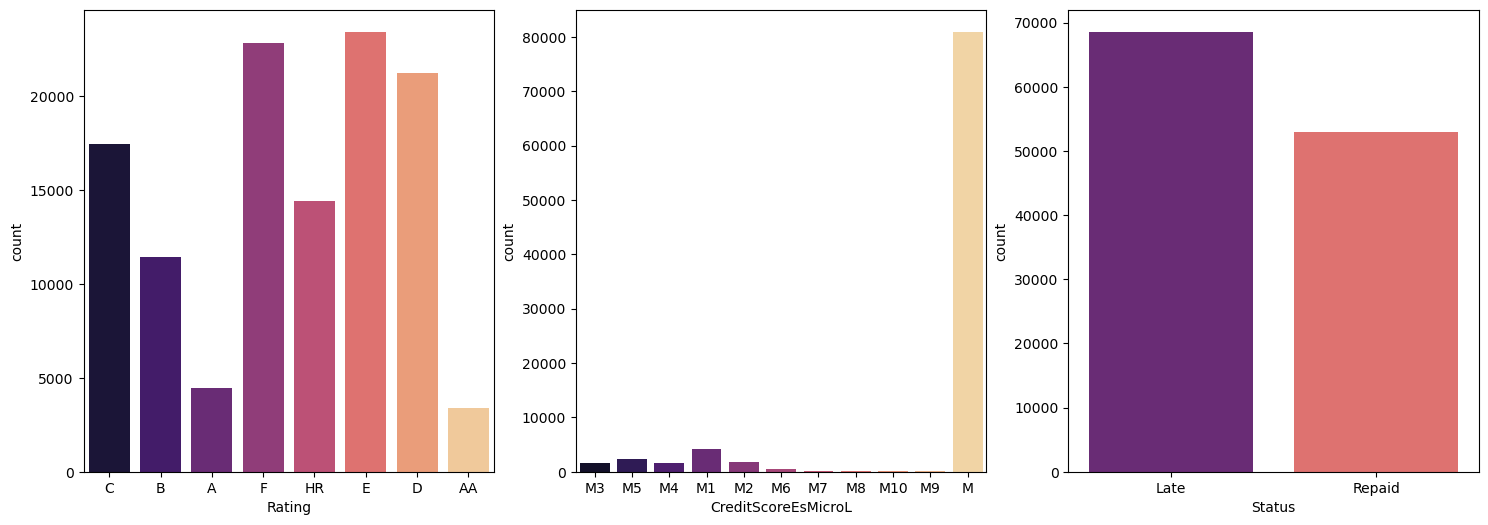

In [20]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x=df["Rating"],palette="magma")
plt.subplot(1,3,2)
sns.countplot(x=df["CreditScoreEsMicroL"],palette="magma")
plt.subplot(1,3,3)
sns.countplot(x=df["Status"],palette="magma")

Most of loans are of Bondora Rating F, E, D, or C. The credit risk score defined by Equifax is mostly mis-entered, hence will be considered as "Undefined". A large amount of loans marked as Late, meaning that these loans are defaulted.


<Axes: xlabel='ProbabilityOfDefault', ylabel='Density'>

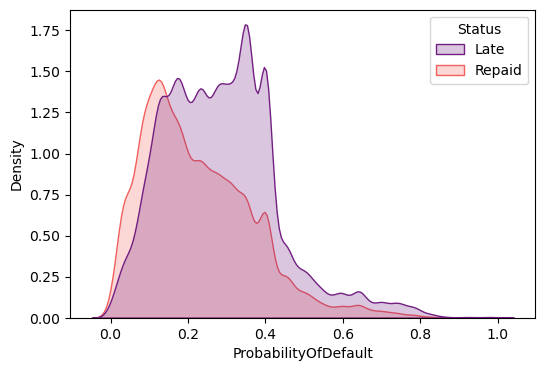

In [21]:
plt.figure(figsize=(6,4))
sns.kdeplot(x=df["ProbabilityOfDefault"], fill=True, hue=df["Status"], palette="magma")

The density of loans that are marked as late is higher than ones marked as repaid in the default probability range of 0.0-0.5. 

<Axes: xlabel='Age', ylabel='Density'>

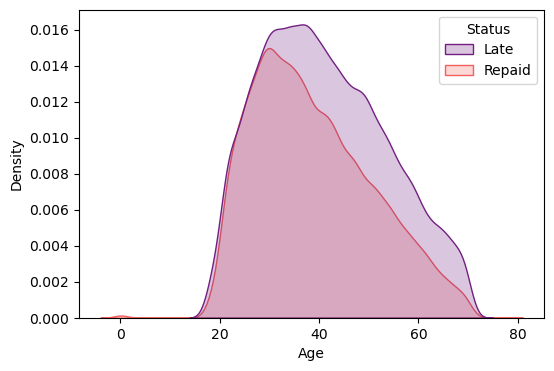

In [22]:
plt.figure(figsize=(6,4))
sns.kdeplot(x=df["Age"], fill=True, hue=df["Status"],palette="magma")

The densitgy of customers with late loans is higher than ones with repaid status at the age range 20-70 years.

<Axes: xlabel='Interest', ylabel='Density'>

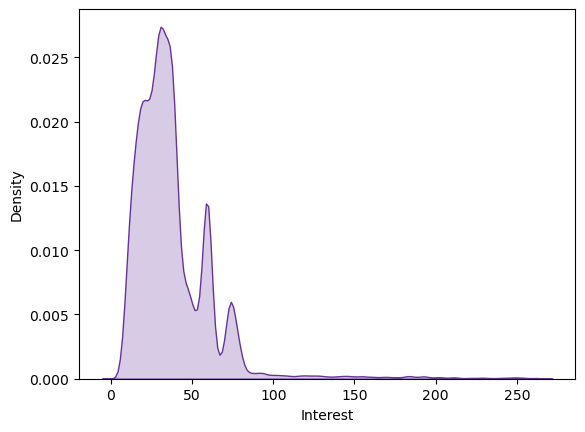

In [23]:
sns.kdeplot(df["Interest"], fill=True, color="rebeccapurple")

The majority of loans have maximum accepted interest rate of 15-40.

<Axes: xlabel='Interest', ylabel='ProbabilityOfDefault'>

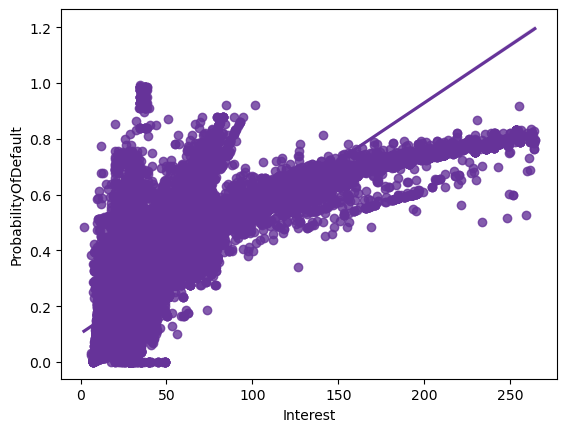

In [24]:
sns.regplot( x=df["Interest"], y=df["ProbabilityOfDefault"], color="rebeccapurple")

The probability of default increases with the increase in loan interest, meaning that customers have difficulties with making payments on time with high interset rates. As a result, credit risks grow.

# Data Preprocessing

The dataset do not explicitly specify the defaulted and non-defaulted loans. There are two features that might be related to the default of the loan: "Status", and "DefaultDate". These features will be combined to define a new feature "Defaulted". If the loan status set as "Late" but have no default date, this loan will be considered as non-defaulted. Also, if loan has a status of "Repaid", it will be considered non-defaulted independent from the "DefaultDate" value.  

In [25]:
lateLoans=df[df["Status"]=="Late"]
lateLoans.head()
lateLoans["DefaultDate"].isnull().sum()

8064

In [26]:
df["Defaulted"] = df.apply(
    lambda row: True if pd.notna(row["DefaultDate"]) and row["Status"] == "Late" else False,
    axis=1
)
df["Defaulted"] = df["Defaulted"].map({True: "Defaulted", False: "Not Defaulted"})
df["Defaulted"].value_counts()

Defaulted
Not Defaulted    60951
Defaulted        60510
Name: count, dtype: int64

Now we can remove features "Status" and "DefaultDate" as we have created a new feature that combines these two.

In [27]:
df=df.drop("Status", axis=1)
df=df.drop("DefaultDate", axis=1)
df.shape

(121461, 58)

Further we will be evaluating the datatypes of the features.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121461 entries, 0 to 179234
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ReportAsOfEOD                           121461 non-null  object 
 1   BidsPortfolioManager                    121461 non-null  int64  
 2   BidsApi                                 121461 non-null  int64  
 3   BidsManual                              121461 non-null  float64
 4   NewCreditCustomer                       121461 non-null  bool   
 5   LoanDate                                121461 non-null  object 
 6   FirstPaymentDate                        121461 non-null  object 
 7   MaturityDate_Original                   121461 non-null  object 
 8   MaturityDate_Last                       121461 non-null  object 
 9   VerificationType                        121411 non-null  float64
 10  LanguageCode                            121461 no

In [29]:
categorical = df.select_dtypes("object")
categorical.head()

,ReportAsOfEOD,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,Country,EmploymentDurationCurrentEmployer,LastPaymentOn,StageActiveSince,Rating,WorseLateCategory,CreditScoreEsMicroL,Defaulted
0,2021-07-20,2016-03-23,2016-05-12,2021-04-12,2020-06-26,EE,MoreThan5Years,2021-06-16,2020-03-03 09:27:48.493000000,C,180+,NaN,Defaulted
1,2021-07-20,2015-06-25,2015-08-17,2020-07-17,2020-07-17,EE,MoreThan5Years,2019-06-19,2019-08-01 14:18:33,B,180+,NaN,Defaulted
2,2021-07-20,2016-01-19,2016-02-22,2021-01-20,2021-01-20,EE,UpTo3Years,2019-10-23,2018-02-28 14:43:37.670000000,A,180+,NaN,Not Defaulted
3,2021-07-20,2015-03-27,2015-05-04,2020-04-01,2020-04-01,ES,UpTo5Years,2020-08-07,2020-11-27 00:00:00,F,180+,M3,Defaulted
4,2021-07-20,2015-12-22,2016-02-01,2020-01-02,2020-01-02,ES,UpTo1Year,2016-02-01,2020-11-27 00:00:00,HR,180+,M5,Defaulted


In [30]:
numerical = df._get_numeric_data()
numerical.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,...,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments
0,970,1150,5.0,False,4.0,1,53,1.0,2125.0,2125.0,...,False,969.16,1187.91,1155.84,433.60,1.0,500.0,590.95,0.0,NaN
1,1295,0,1705.0,False,1.0,1,50,1.0,3000.0,3000.0,...,False,563.59,360.07,2436.41,2291.82,1.0,1800.0,445.26,1.0,NaN
2,2700,565,5835.0,True,4.0,1,44,0.0,10630.0,9100.0,...,False,6537.00,1708.47,0.00,0.00,0.0,0.0,0.00,0.0,NaN
3,1115,0,385.0,True,3.0,6,42,0.0,1500.0,1500.0,...,False,464.73,355.92,1035.27,2833.83,0.0,0.0,0.00,1.0,NaN
4,305,0,785.0,True,4.0,6,34,1.0,1595.0,1090.0,...,False,0.01,0.00,1089.99,4215.37,0.0,0.0,0.00,0.0,NaN


In [31]:
numerical.describe()

,BidsPortfolioManager,BidsApi,BidsManual,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,Interest,...,ModelVersion,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments
count,121461.000000,121461.000000,121461.000000,121411.000000,121461.000000,121461.000000,121416.000000,121461.000000,121461.000000,121461.000000,...,118823.000000,121461.000000,121461.000000,121461.000000,121107.000000,121453.000000,121453.000000,81896.000000,121453.000000,54531.000000
mean,963.968270,29.737652,543.546900,2.970785,2.974370,39.990993,0.469049,2723.155439,2522.255902,38.126434,...,4.768446,1192.930346,565.108661,1289.897057,1346.292701,1.288194,2581.428835,929.762390,0.067532,53.883186
std,1363.794909,153.663101,756.765106,1.360459,1.983746,12.326199,0.655714,2371.562360,2157.411853,26.750151,...,3.820990,1666.492459,914.532037,1866.667372,3478.027107,2.189723,4366.737687,2029.557547,0.361118,10.155615
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,6.390000,2.000000,...,0.000000,0.000000,0.000000,-34.200000,-2.660000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,145.000000,0.000000,69.000000,1.000000,1.000000,30.000000,0.000000,740.000000,740.000000,22.200000,...,4.000000,144.670000,60.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
50%,456.000000,0.000000,294.000000,4.000000,3.000000,38.000000,0.000000,2125.000000,2125.000000,32.140000,...,6.000000,530.000000,235.590000,454.870000,62.810000,0.000000,0.000000,190.645000,0.000000,60.000000
75%,1229.000000,5.000000,706.000000,4.000000,4.000000,49.000000,1.000000,4150.000000,3580.000000,45.280000,...,6.000000,1590.000000,690.530000,2064.160000,1318.010000,2.000000,3720.000000,800.222500,0.000000,60.000000
max,10625.000000,7570.000000,10630.000000,4.000000,22.000000,77.000000,2.000000,10632.000000,10632.000000,264.310000,...,99.000000,10632.000000,18393.460000,10632.000000,78982.070000,27.000000,68114.000000,34077.420000,11.000000,66.000000


We will delete all the features that are related to the dates, since the study does not use time series analysis for default prediction.

In [32]:
dated = ["ReportAsOfEOD", "LoanDate", "FirstPaymentDate", "MaturityDate_Original", "MaturityDate_Last", "LastPaymentOn", "StageActiveSince"]
df = df.drop(dated, axis=1)

In [33]:
categorical = df.select_dtypes("object")
categorical.head()

,Country,EmploymentDurationCurrentEmployer,Rating,WorseLateCategory,CreditScoreEsMicroL,Defaulted
0,EE,MoreThan5Years,C,180+,NaN,Defaulted
1,EE,MoreThan5Years,B,180+,NaN,Defaulted
2,EE,UpTo3Years,A,180+,NaN,Not Defaulted
3,ES,UpTo5Years,F,180+,M3,Defaulted
4,ES,UpTo1Year,HR,180+,M5,Defaulted


In [34]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121461 entries, 0 to 179234
Data columns (total 45 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    121461 non-null  int64  
 1   BidsApi                                 121461 non-null  int64  
 2   BidsManual                              121461 non-null  float64
 3   NewCreditCustomer                       121461 non-null  bool   
 4   VerificationType                        121411 non-null  float64
 5   LanguageCode                            121461 non-null  int64  
 6   Age                                     121461 non-null  int64  
 7   Gender                                  121416 non-null  float64
 8   AppliedAmount                           121461 non-null  float64
 9   Amount                                  121461 non-null  float64
 10  Interest                                121461 no

Also, there is a number of features that are marked as numerical, however are categorical but coded with numbers. These features are VerificationType,  Language Code, Gender, Use of Loan, Education, Marital Status,EmployementStatus, OccupationArea, HomeOwnershipType, RecoveryStage, ModelVersion. These features would be recoded inito categorical according to data description.

In [35]:
numerical['VerificationType'].value_counts()

VerificationType
4.0    73175
1.0    37435
3.0     8965
2.0     1828
0.0        8
Name: count, dtype: int64

In [36]:
df['VerificationType'][df['VerificationType'] == 0.0] = 'Undefined'
df['VerificationType'][df['VerificationType'] == 1.0] = 'Income_unverified'
df['VerificationType'][df['VerificationType'] == 2.0] = 'Income_unverified_crossreferenced_phone'
df['VerificationType'][df['VerificationType'] == 3.0] = 'Income_verified'
df['VerificationType'][df['VerificationType'] == 4.0] = 'Income_expenses_verified'
df['VerificationType'].value_counts()

VerificationType
Income_expenses_verified                   73175
Income_unverified                          37435
Income_verified                             8965
Income_unverified_crossreferenced_phone     1828
Undefined                                      8
Name: count, dtype: int64

In [37]:
df['Gender'].value_counts()

Gender
0.0    75449
1.0    34984
2.0    10983
Name: count, dtype: int64

In [38]:
df['Gender'][df['Gender'] == 0.0] = 'Male'
df['Gender'][df['Gender'] == 1.0] = 'Female'
df['Gender'][df['Gender'] == 2.0] = 'Undefined'
df['Gender'].value_counts()

Gender
Male         75449
Female       34984
Undefined    10983
Name: count, dtype: int64

In [39]:
df['LanguageCode'].value_counts()

LanguageCode
1     53751
4     30771
6     24213
3     11456
2       960
9       294
22        6
5         5
10        1
13        1
7         1
21        1
15        1
Name: count, dtype: int64

In [40]:
df['LanguageCode'][df['LanguageCode'] == 1] = 'Estonian'
df['LanguageCode'][df['LanguageCode'] == 2] = 'English'
df['LanguageCode'][df['LanguageCode'] == 3] = 'Russian'
df['LanguageCode'][df['LanguageCode'] == 4] = 'Finnish'
df['LanguageCode'][df['LanguageCode'] == 5] = 'German'
df['LanguageCode'][df['LanguageCode'] == 6] = 'Spanish'
df['LanguageCode'][df['LanguageCode'] == 9] = 'Slovakian'
df['LanguageCode'][df['LanguageCode'] == 7] = 'Undefined'
df['LanguageCode'][df['LanguageCode'] == 10] = 'Undefined'
df['LanguageCode'][df['LanguageCode'] == 13] = 'Undefined'
df['LanguageCode'][df['LanguageCode'] == 15] = 'Undefined'
df['LanguageCode'][df['LanguageCode'] == 21] = 'Undefined'
df['LanguageCode'][df['LanguageCode'] == 22] = 'Undefined'
df['LanguageCode'].value_counts()


LanguageCode
Estonian     53751
Finnish      30771
Spanish      24213
Russian      11456
English        960
Slovakian      294
Undefined       11
German           5
Name: count, dtype: int64

In [41]:
df['UseOfLoan'].value_counts()

UseOfLoan
-1      86395
 7       9352
 2       8686
 0       6672
 6       3047
 3       1871
 5       1710
 8       1460
 4       1314
 1        901
 102       21
 110       17
 104        6
 101        5
 107        2
 108        1
 106        1
Name: count, dtype: int64

In [42]:
df['UseOfLoan'][df['UseOfLoan'] == -1] = 'Undefined'
df['UseOfLoan'][df['UseOfLoan'] == 0] = 'Loan_consolidation'
df['UseOfLoan'][df['UseOfLoan'] == 1] = 'Real_estate'
df['UseOfLoan'][df['UseOfLoan'] == 2] = 'Home_improvement'
df['UseOfLoan'][df['UseOfLoan'] == 3] = 'Business'
df['UseOfLoan'][df['UseOfLoan'] == 4] = 'Education'
df['UseOfLoan'][df['UseOfLoan'] == 5] = 'Travel'
df['UseOfLoan'][df['UseOfLoan'] == 6] = 'Vehicle'
df['UseOfLoan'][df['UseOfLoan'] == 7] = 'Other'
df['UseOfLoan'][df['UseOfLoan'] == 8] = 'Health'
df['UseOfLoan'][df['UseOfLoan'] == 101] = 'Working_capital_financing'
df['UseOfLoan'][df['UseOfLoan'] == 102] = 'Purchase_of_machinery_equipment'
df['UseOfLoan'][df['UseOfLoan'] == 104] = 'Accounts_receivable_financing'
df['UseOfLoan'][df['UseOfLoan'] == 106] = 'Construction_finance'
df['UseOfLoan'][df['UseOfLoan'] == 107] = 'Acquisition_of_stocks'
df['UseOfLoan'][df['UseOfLoan'] == 108] = 'Acquisition_of_real_estate'
df['UseOfLoan'][df['UseOfLoan'] == 110] = 'Other_business'
df['UseOfLoan'].value_counts()

UseOfLoan
Undefined                          86395
Other                               9352
Home_improvement                    8686
Loan_consolidation                  6672
Vehicle                             3047
Business                            1871
Travel                              1710
Health                              1460
Education                           1314
Real_estate                          901
Purchase_of_machinery_equipment       21
Other_business                        17
Accounts_receivable_financing          6
Working_capital_financing              5
Acquisition_of_stocks                  2
Acquisition_of_real_estate             1
Construction_finance                   1
Name: count, dtype: int64

In [43]:
df["Education"].value_counts()

Education
 4.0    44809
 5.0    31618
 3.0    27431
 1.0    11446
 2.0     5950
-1.0      149
 0.0        8
Name: count, dtype: int64

In [44]:
df['Education'][df['Education'] == 1.0] = 'Primary'
df['Education'][df['Education'] == 2.0] = 'Basic'
df['Education'][df['Education'] == 3.0] = 'Vocational'
df['Education'][df['Education'] == 4.0] = 'Secondary'
df['Education'][df['Education'] == 5.0] = 'Higher'
df['Education'][df['Education'] == -1.0] = 'Undefined'
df['Education'][df['Education'] == 0.0] = 'Undefined'
df['Education'].value_counts()

Education
Secondary     44809
Higher        31618
Vocational    27431
Primary       11446
Basic          5950
Undefined       157
Name: count, dtype: int64

In [45]:
df["MaritalStatus"].value_counts()

MaritalStatus
-1.0    86395
 3.0    12025
 1.0    10188
 2.0     8965
 4.0     3264
 5.0      566
 0.0        8
Name: count, dtype: int64

In [46]:
df['MaritalStatus'][df['MaritalStatus'] == 1.0] = 'Married'
df['MaritalStatus'][df['MaritalStatus'] == 2.0] = 'Cohabitant'
df['MaritalStatus'][df['MaritalStatus'] == 3.0] = 'Single'
df['MaritalStatus'][df['MaritalStatus'] == 4.0] = 'Divorced'
df['MaritalStatus'][df['MaritalStatus'] == 5.0] = 'Widow'
df['MaritalStatus'][df['MaritalStatus'] == -1.0] = 'Undefined'
df['MaritalStatus'][df['MaritalStatus'] == 0.0] = 'Undefined'
df['MaritalStatus'].value_counts()

MaritalStatus
Undefined     86403
Single        12025
Married       10188
Cohabitant     8965
Divorced       3264
Widow           566
Name: count, dtype: int64

In [47]:
df["OccupationArea"].value_counts()

OccupationArea
-1.0     86446
 1.0      8061
 7.0      3408
 6.0      3198
 3.0      3050
 8.0      2390
 17.0     2309
 9.0      2192
 10.0     1863
 15.0     1636
 16.0     1345
 11.0     1103
 19.0      948
 14.0      818
 18.0      565
 4.0       563
 13.0      532
 12.0      461
 5.0       350
 2.0       121
 0.0        11
Name: count, dtype: int64

In [48]:
df['OccupationArea'][df['OccupationArea'] == 1] = 'Other'
df['OccupationArea'][df['OccupationArea'] == 2] = 'Mining'
df['OccupationArea'][df['OccupationArea'] == 3] = 'Processing'
df['OccupationArea'][df['OccupationArea'] == 4] = 'Energy'
df['OccupationArea'][df['OccupationArea'] == 5] = 'Utilities'
df['OccupationArea'][df['OccupationArea'] == 6] = 'Construction'
df['OccupationArea'][df['OccupationArea'] == 7] = 'Retail_and_wholesale'
df['OccupationArea'][df['OccupationArea'] == 8] = 'Transport_and_warehousing'
df['OccupationArea'][df['OccupationArea'] == 9] = 'Hospitality_and_catering'
df['OccupationArea'][df['OccupationArea'] == 10] = 'Info_and_telecom'
df['OccupationArea'][df['OccupationArea'] == 11] = 'Finance_and_insurance'
df['OccupationArea'][df['OccupationArea'] == 12] = 'Real_estate'
df['OccupationArea'][df['OccupationArea'] == 13] = 'Research'
df['OccupationArea'][df['OccupationArea'] == 14] = 'Administrative'
df['OccupationArea'][df['OccupationArea'] == 15] = 'Civil_service_and_military'
df['OccupationArea'][df['OccupationArea'] == 16] = 'Education'
df['OccupationArea'][df['OccupationArea'] == 17] = 'Healthcare_and_social_help'
df['OccupationArea'][df['OccupationArea'] == 18] = 'Art_and_entertainment'
df['OccupationArea'][df['OccupationArea'] == 19] = 'Agriculture_forestry_and_fishing'
df['OccupationArea'][df['OccupationArea'] == -1.0] = 'Undefined'
df['OccupationArea'][df['OccupationArea'] == 0.0] = 'Undefined'
df['OccupationArea'].value_counts()

OccupationArea
Undefined                           86457
Other                                8061
Retail_and_wholesale                 3408
Construction                         3198
Processing                           3050
Transport_and_warehousing            2390
Healthcare_and_social_help           2309
Hospitality_and_catering             2192
Info_and_telecom                     1863
Civil_service_and_military           1636
Education                            1345
Finance_and_insurance                1103
Agriculture_forestry_and_fishing      948
Administrative                        818
Art_and_entertainment                 565
Energy                                563
Research                              532
Real_estate                           461
Utilities                             350
Mining                                121
Name: count, dtype: int64

In [49]:
df["EmploymentStatus"].value_counts()

EmploymentStatus
-1.0    86395
 3.0    28796
 5.0     1864
 6.0     1762
 4.0     1255
 2.0     1155
 0.0       32
Name: count, dtype: int64

In [50]:
df['EmploymentStatus'][df['EmploymentStatus'] == 1.0] = 'Unemployed'
df['EmploymentStatus'][df['EmploymentStatus'] == 2.0] = 'Part_empl'
df['EmploymentStatus'][df['EmploymentStatus'] == 3.0] = 'Fully_empl'
df['EmploymentStatus'][df['EmploymentStatus'] == 4.0] = 'Self_empl'
df['EmploymentStatus'][df['EmploymentStatus'] == 5.0] = 'Entrepreneur'
df['EmploymentStatus'][df['EmploymentStatus'] == 6.0] = 'Retiree'
df['EmploymentStatus'][df['EmploymentStatus'] == -1.0] = 'Undefined'
df['EmploymentStatus'][df['EmploymentStatus'] == 0.0] = 'Undefined'
df["EmploymentStatus"].value_counts()

EmploymentStatus
Undefined       86427
Fully_empl      28796
Entrepreneur     1864
Retiree          1762
Self_empl        1255
Part_empl        1155
Name: count, dtype: int64

In [51]:
df["Restructured"].value_counts()

Restructured
False    88406
True     33055
Name: count, dtype: int64

In [52]:
df['Restructured'][df['Restructured'] == False]='No'
df['Restructured'][df['Restructured'] == True]='Yes'
df["Restructured"].value_counts()

Restructured
No     88406
Yes    33055
Name: count, dtype: int64

In [53]:
df["NewCreditCustomer"].value_counts()

NewCreditCustomer
True     73770
False    47691
Name: count, dtype: int64

In [54]:
df['NewCreditCustomer'][df['NewCreditCustomer'] == False] = 'Old_customer'
df['NewCreditCustomer'][df['NewCreditCustomer'] == True] = 'New_customer'
df["NewCreditCustomer"].value_counts()

NewCreditCustomer
New_customer    73770
Old_customer    47691
Name: count, dtype: int64

In [55]:
df['HomeOwnershipType'].value_counts()

HomeOwnershipType
 1.0     40609
 3.0     28204
 2.0     19560
 8.0     13411
 10.0     7245
 4.0      4352
 7.0      2987
 6.0      1517
 5.0      1204
 9.0       666
 0.0        46
-1.0         3
Name: count, dtype: int64

In [56]:
df['HomeOwnershipType'][df['HomeOwnershipType'] == -1.0] = 'Undefined'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 0.0] = 'Homeless'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 1.0] = 'Owner'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 2.0] = 'Living_with_parents'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 3.0] = 'Tenant_pre_furnished_property'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 4.0] = 'Tenant_unfurnished_property'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 5.0] = 'Council_house'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 6.0] = 'Joint_tenant'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 7.0] = 'Joint_ownership'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 8.0] = 'Mortgage'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 9.0] = 'Owner_with_encumbrance'
df['HomeOwnershipType'][df['HomeOwnershipType'] == 10.0] = 'Other'
df['HomeOwnershipType'].value_counts()

HomeOwnershipType
Owner                            40609
Tenant_pre_furnished_property    28204
Living_with_parents              19560
Mortgage                         13411
Other                             7245
Tenant_unfurnished_property       4352
Joint_ownership                   2987
Joint_tenant                      1517
Council_house                     1204
Owner_with_encumbrance             666
Homeless                            46
Undefined                            3
Name: count, dtype: int64

In [57]:
df.to_csv('datasets/Bondora_preprocessed.csv',index=False)

In [58]:
df_new =pd.read_csv('datasets/Bondora_preprocessed.csv', low_memory=False)
df_new.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments,Defaulted
0,970,1150,5.0,Old_customer,Income_expenses_verified,Estonian,53,Female,EE,2125.0,...,969.16,1187.91,1155.84,433.60,1.0,500.0,590.95,0.0,NaN,Defaulted
1,1295,0,1705.0,Old_customer,Income_unverified,Estonian,50,Female,EE,3000.0,...,563.59,360.07,2436.41,2291.82,1.0,1800.0,445.26,1.0,NaN,Defaulted
2,2700,565,5835.0,New_customer,Income_expenses_verified,Estonian,44,Male,EE,10630.0,...,6537.00,1708.47,0.00,0.00,0.0,0.0,0.00,0.0,NaN,Not Defaulted
3,1115,0,385.0,New_customer,Income_verified,Spanish,42,Male,ES,1500.0,...,464.73,355.92,1035.27,2833.83,0.0,0.0,0.00,1.0,NaN,Defaulted
4,305,0,785.0,New_customer,Income_expenses_verified,Spanish,34,Female,ES,1595.0,...,0.01,0.00,1089.99,4215.37,0.0,0.0,0.00,0.0,NaN,Defaulted


Preprocessed dataset is now loaded at 'datasets/Bondora_preprocessed.csv'